In [2]:
import pandas as pd
import numpy as np  


In [3]:
num_samples = 10

random_state = 16

num_of_ratios = 5

Load the metadata file. We index it by sample_id, but keep this column as well as a feature

In [4]:
metadata = pd.read_csv("../Data/metadata.csv").set_index('sample_id',drop = False)

metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1494 entries, S0000 to S1505
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sample_id          1494 non-null   object
 1   split              1494 non-null   object
 2   instrument_type    1494 non-null   object
 3   features_path      1494 non-null   object
 4   features_md5_hash  1494 non-null   object
dtypes: object(5)
memory usage: 70.0+ KB


In [5]:
metadata.head()

sample_id  split instrument_type             features_path  \
sample_id                                                              
S0000         S0000  train      commercial  train_features/S0000.csv   
S0001         S0001  train      commercial  train_features/S0001.csv   
S0002         S0002  train      commercial  train_features/S0002.csv   
S0003         S0003  train      commercial  train_features/S0003.csv   
S0004         S0004  train      commercial  train_features/S0004.csv   

                          features_md5_hash  
sample_id                                    
S0000      017b9a71a702e81a828e6242aa15f049  
S0001      0d09840214054d254bd49436c6a6f315  
S0002      3f58b3c9b001bfed6ed4e4f757083e09  
S0003      e9a12f96114a2fda60b36f4c0f513fb1  
S0004      b67603d3931897bfa796ac42cc16de78

We complete the paths in the "features_path" column so that we can read the corresponding csv files more easily.

In [6]:
def replace_value (x):
    return x.replace(" ","")

new_path = "../Data/"

def fix_path(incomplete_path):
    return new_path + incomplete_path

metadata.features_path = metadata['features_path'].apply(replace_value)
metadata.features_path = metadata['features_path'].apply(fix_path)

metadata.head()

sample_id  split instrument_type                     features_path  \
sample_id                                                                      
S0000         S0000  train      commercial  ../Data/train_features/S0000.csv   
S0001         S0001  train      commercial  ../Data/train_features/S0001.csv   
S0002         S0002  train      commercial  ../Data/train_features/S0002.csv   
S0003         S0003  train      commercial  ../Data/train_features/S0003.csv   
S0004         S0004  train      commercial  ../Data/train_features/S0004.csv   

                          features_md5_hash  
sample_id                                    
S0000      017b9a71a702e81a828e6242aa15f049  
S0001      0d09840214054d254bd49436c6a6f315  
S0002      3f58b3c9b001bfed6ed4e4f757083e09  
S0003      e9a12f96114a2fda60b36f4c0f513fb1  
S0004      b67603d3931897bfa796ac42cc16de78

Check what proportion of samples in the metadata file are associated with commercial vs SAM instruments

In [7]:
metadata.instrument_type.value_counts(normalize=True)

instrument_type
commercial    1.0
Name: proportion, dtype: float64

Turns out they are all commercial. Now store the various paths to csv folders into dictionaries, depending on whether the samples are in the train, val or test set. We do not have access to any test_files, so those can probably be disregarded. After this point, metadata will not be used again


In [8]:
train_files = metadata[metadata.split == "train"]["features_path"].to_dict()
val_files = metadata[metadata.split == 'val']["features_path"].to_dict()
test_files = metadata[metadata.split == 'test']["features_path"].to_dict()

# creates a dictionary that contains a path for each sample

In [9]:
train_labels = pd.read_csv("../Data/train_labels.csv",index_col="sample_id")

train_labels.head()

basalt  carbonate  chloride  iron_oxide  oxalate  oxychlorine  \
sample_id                                                                  
S0000           0          0         0           0        0            0   
S0001           0          1         0           0        0            0   
S0002           0          0         0           0        0            1   
S0003           0          1         0           1        0            0   
S0004           0          0         0           1        0            1   

           phyllosilicate  silicate  sulfate  sulfide  
sample_id                                              
S0000                   0         0        1        0  
S0001                   0         0        0        0  
S0002                   0         0        0        0  
S0003                   0         0        1        0  
S0004                   1         0        0        0

We can see what proportion of the labels contains each ion

In [10]:
for column_name in train_labels.columns:
    print(train_labels[column_name].value_counts(normalize=True))

basalt
0    0.87931
1    0.12069
Name: proportion, dtype: float64
carbonate
0    0.871353
1    0.128647
Name: proportion, dtype: float64
chloride
0    0.876658
1    0.123342
Name: proportion, dtype: float64
iron_oxide
0    0.775862
1    0.224138
Name: proportion, dtype: float64
oxalate
0    0.960212
1    0.039788
Name: proportion, dtype: float64
oxychlorine
0    0.762599
1    0.237401
Name: proportion, dtype: float64
phyllosilicate
0    0.679045
1    0.320955
Name: proportion, dtype: float64
silicate
0    0.862069
1    0.137931
Name: proportion, dtype: float64
sulfate
0    0.803714
1    0.196286
Name: proportion, dtype: float64
sulfide
0    0.952255
1    0.047745
Name: proportion, dtype: float64


Print the ions in descending order of frequency:

In [11]:
sums_normalized = train_labels.aggregate("sum").sort_values(ascending = False)

print(sums_normalized.index.values)


['phyllosilicate' 'oxychlorine' 'iron_oxide' 'sulfate' 'silicate'
 'carbonate' 'chloride' 'basalt' 'sulfide' 'oxalate']


Now put them in a bar plot

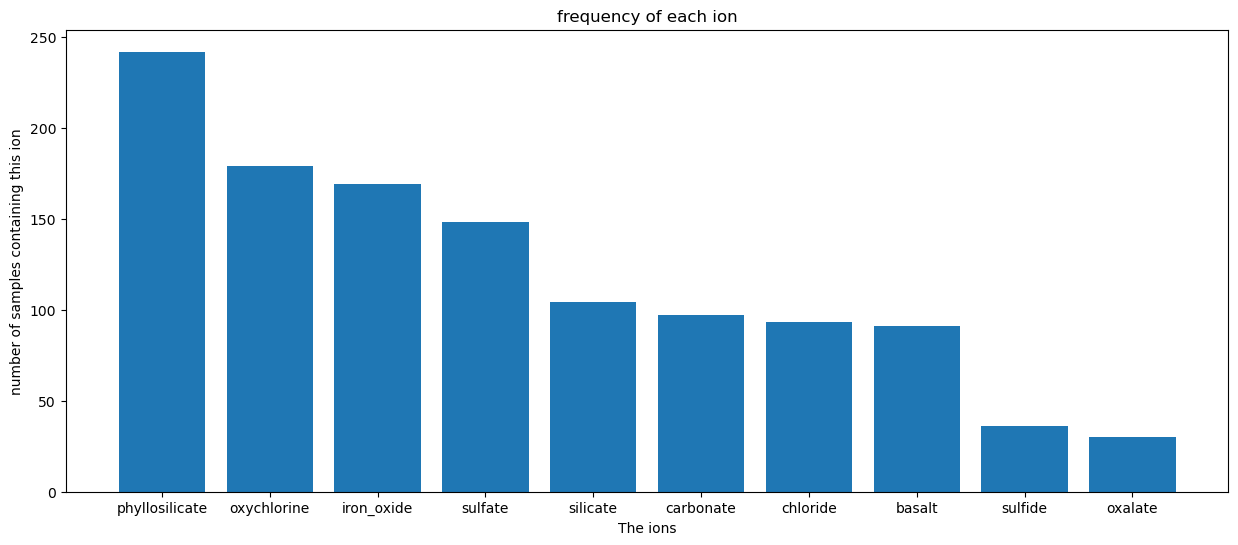

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

plt.bar( sums_normalized.index.values, sums_normalized.values)

plt.title('frequency of each ion')

plt.xlabel("The ions")

plt.ylabel("number of samples containing this ion")

plt.show()



For a collection of samples we plot temperature as a function of time.

In [13]:


from random import sample 

samples_list = sample(list(train_files.keys()),25)

num_samples = len(samples_list)

num_samples


25

/var/folders/sb/bm5l_dgs6vg61tdy4phf0vcm0000gn/T/ipykernel_6673/2710971998.py:28: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  fig.tight_layout()


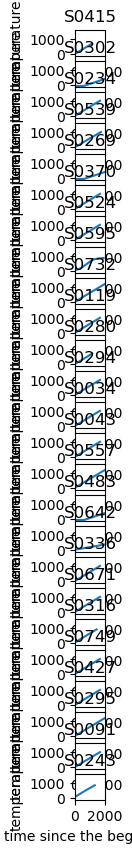

In [14]:
# Create a figure and an array of subplots indexed using axis

fig, ax = plt.subplots(num_samples,sharey = True,height_ratios=0.4*np.ones(num_samples),figsize = (10*num_samples,10))


for i, sample in enumerate(samples_list): 

    df = pd.read_csv(train_files[sample])

    ax[i].plot(df.time,df.temp)
    
    ax[i].set(xlim = (-1,2000),ylim = (-100,1600))

    ax[i].set_aspect('equal','box')
    
    plt.xlabel('time since the beginning')
    
    ax[i].set_ylabel('temperature')
    
    ax[i].set_title(sample)



fig.set_size_inches(14,10)



fig.tight_layout()

plt.show()



One can see the plots corresponding to various samples by running all cells above.

Now we plot the various ions grouped by m/z, on a logarithmic scale.

/var/folders/sb/bm5l_dgs6vg61tdy4phf0vcm0000gn/T/ipykernel_6673/1957843419.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


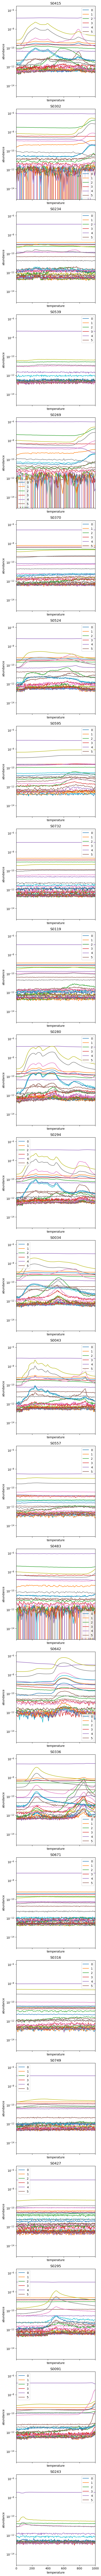

In [15]:
fig, ax = plt.subplots(num_samples,1,sharex = True,sharey = True,figsize = (5,5*num_samples))


for i, sample in enumerate(samples_list):

    df = pd.read_csv(train_files[sample])
    

    plt.subplot(num_samples,1,i+1)

    

    for mz in range(0,28):
        X = df[df['m/z'] == mz].time
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")

        
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        
        # ax[i] = plt.show()
    
    plt.legend()


    
    plt.yscale('log')
    plt.title(sample)
    
    del df


fig.tight_layout()     
    
fig.show()






## Preprocessing the data

We do the data cleaning suggested by the post. Note that the part about removing non-integer values of m/z is probably not relevant to us, it seems that it only applies to SAM samples, which we do not have access to.

In [16]:
def drop_non_int_and_He(df):
    df2 = df
    df2 = df2[df2['m/z'].transform(round) == df2['m/z']]
    df2 = df2[df2['m/z']<100]
    df2 = df2[df2['m/z'] != 4]
    return df2

In [17]:
def subtract_min(df):    

    df["abundance_minsub"] = df.groupby(["m/z"])["abundance"].transform(
        lambda x: (x - x.min())
    )

    return df


The next function scales the abundances by the formula $\frac{x-x_{\mathrm{min}}}{x_{max}-x_{min}}$ and forces them to be in the range (0,1)

In [18]:
from sklearn.preprocessing import minmax_scale

def scale_to_zero_one(df):
    df['zero_one_rescale'] = minmax_scale(df['abundance_minsub'])
    assert (df['zero_one_rescale'].max()<=1)
    return df
    


The following combines the procedures above

In [19]:
def preprocess(df):
    return scale_to_zero_one(subtract_min(drop_non_int_and_He(df)))

/var/folders/sb/bm5l_dgs6vg61tdy4phf0vcm0000gn/T/ipykernel_6673/3252275473.py:78: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


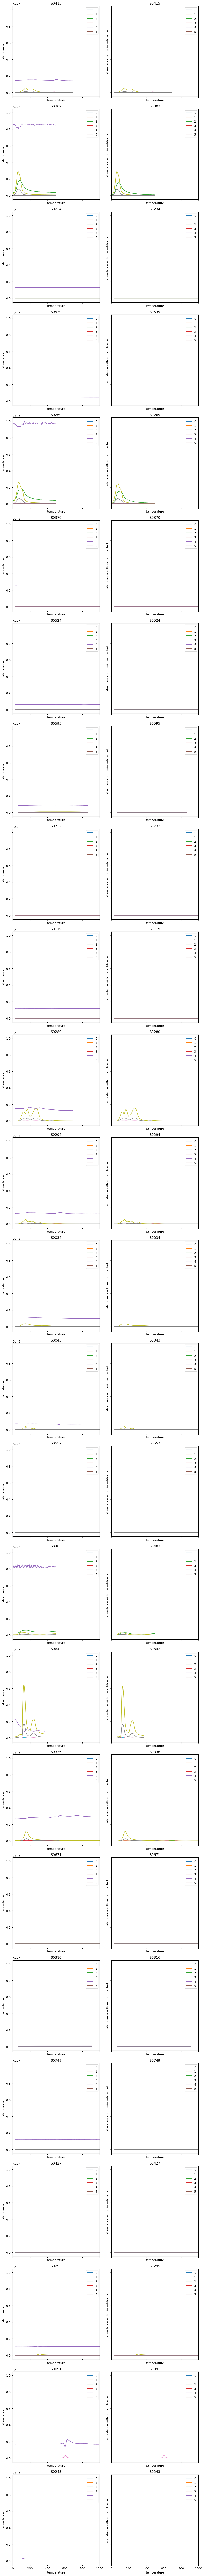

In [20]:

# samples_list = ['S0001','S0025']
# num_samples = len(samples_list)

fig, ax = plt.subplots(num_samples,2,sharex = True,sharey = True,figsize = (10,5*num_samples))


for i, sample in enumerate(samples_list):



    df = pd.read_csv(train_files[sample])

    df_mod = subtract_min(drop_non_int_and_He(df))



    plt.subplot(num_samples,2,2*i+1)

    

    for mz in range(0,28):
        X = df[df['m/z'] == mz].temp
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        plt.title(sample)

        plt.legend()

        plt.title(sample)
        
        # ax[i] = plt.show()
        plt.yscale('linear')
    
    plt.subplot(num_samples,2,2*i+2)    

    for mz in range(0,28):
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].abundance_minsub

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted')
        plt.xlim(0,1000)
        plt.title(sample)
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')
    
    



fig.tight_layout()     
    
fig.show()





Now we plot our samples with the 0-1 rescaling included

/var/folders/sb/bm5l_dgs6vg61tdy4phf0vcm0000gn/T/ipykernel_6673/104872504.py:78: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


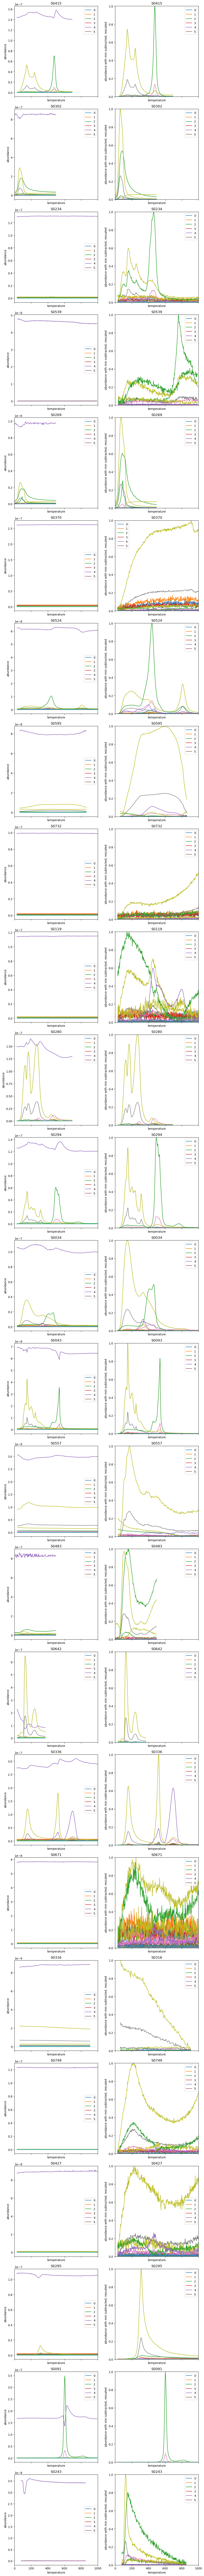

In [21]:


fig, ax = plt.subplots(num_samples,2,sharex = True,figsize = (10,5*num_samples))




for i, sample in enumerate(samples_list):



    df = pd.read_csv(train_files[sample])

    df_mod = preprocess(df)



    plt.subplot(num_samples,2,2*i+1)

    

    for mz in range(0,100):
        X = df[df['m/z'] == mz].temp
        y = df[df['m/z'] == mz].abundance

        # We show a legend for all values of mz 
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        plt.title(sample)

        plt.legend()

        plt.title(sample)
        
        # ax[i] = plt.show()
        plt.yscale('linear')
    
    plt.subplot(num_samples,2,2*i+2)    

    for mz in range(0, 100):
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].zero_one_rescale

        # We show a legend for all values of mz    
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted, rescaled')
        plt.xlim(0,1000)
        plt.ylim(0,1)
        plt.title(sample)
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')
    
    



fig.tight_layout()     
    
fig.show()





We need to consider the temperature at which the ions come out and look at the relative ratio of the area under the curves at each temperature range.

The following creates a dictionary containing all train files. By changing the sample_list variable, one can make a dictionary with only a subset of them

In [69]:
samples_list = list(train_files.keys())
print (len(samples_list))

754


In [70]:
# Define temp bins
temp_bin = pd.interval_range(start=-100, end=1500, freq=100)

# Make list to store temp bin labels
index_list = []
for temp in temp_bin:
    index_list.append(str(temp))

x_min = -100
x_max = 1500

num_bins = 16
bin_width = (x_max - x_min) / num_bins

DictAreas = {}

# samples_areas = np.zeros(len(samples_list))

# Import trapezoid rule to integrate under curve
from scipy.integrate import simpson, trapezoid

for i, sample in enumerate(samples_list):

    
    # print (np.shape(areas))
    df = pd.read_csv(train_files[sample]) # read the sample file

    df_mod = preprocess(df)

    areas = np.zeros((num_bins, 100)) # the dimensions of each areas df are adjusted to each sample 


    

  
    for mz in range(100): # also create an index k for the k-th value of m/z
        # print(k, len(list(set(df['m/z'].values))))
        
        df_mz = df_mod[df_mod['m/z'] == mz]

        for j in range(num_bins):
            x_left = x_min + j * bin_width
            x_right = x_left + bin_width
            
            # Make x array by getting values in dataframe between x_left and x_right
            x_array = np.array(df_mz[df_mz['temp'].between(x_left, x_right, inclusive='right')]['temp'])
            y_array = np.array(df_mz[df_mz['temp'].between(x_left, x_right, inclusive='right')]['zero_one_rescale'])

            # Add calculated area to areas array
            areas[j,mz] = trapezoid(y_array, x_array)

        
    # Make dataframe out of areas array and set the index to the temp bins
    areas_df = pd.DataFrame(areas)
    areas_df.index = index_list 

    DictAreas[sample] = areas_df
         
    

In [66]:
DictAreas['S0595']

0         1         2         3    4         5         6   \
(-100, 0]     0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
(0, 100]      0.050039  0.041280  0.028205  0.055232  0.0  0.018733  0.001127   
(100, 200]    0.169386  0.190409  0.097980  0.160314  0.0  0.048650  0.003064   
(200, 300]    0.209397  0.296053  0.134081  0.143583  0.0  0.063581  0.002087   
(300, 400]    0.296499  0.397708  0.206485  0.152023  0.0  0.054439  0.003684   
(400, 500]    0.307056  0.392150  0.176182  0.125897  0.0  0.046548  0.003837   
(500, 600]    0.314583  0.451335  0.220354  0.152466  0.0  0.049459  0.003387   
(600, 700]    0.297462  0.399524  0.180998  0.131165  0.0  0.056971  0.003027   
(700, 800]    0.269596  0.364833  0.148852  0.143295  0.0  0.060860  0.003036   
(800, 900]    0.125616  0.153368  0.073527  0.116083  0.0  0.034213  0.002064   
(900, 1000]   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
(1000, 1100]  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
(1100, 1200]  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
(1200, 1300]  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
(1300, 1400]  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
(1400, 1500]  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   

                    7         8         9   ...        90        91        92  \
(-100, 0]     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
(0, 100]      0.001044  0.001725  0.000616  ...  0.000510  0.000753  0.000659   
(100, 200]    0.002973  0.004153  0.001896  ...  0.001240  0.001916  0.001713   
(200, 300]    0.002303  0.003546  0.001609  ...  0.001216  0.001931  0.001693   
(300, 400]    0.002229  0.004667  0.002196  ...  0.001430  0.002857  0.002398   
(400, 500]    0.002233  0.003936  0.001802  ...  0.001211  0.002976  0.002344   
(500, 600]    0.003298  0.004618  0.002104  ...  0.001511  0.003185  0.002494   
(600, 700]    0.002508  0.003820  0.001838  ...  0.001409  0.001877  0.002030   
(700, 800]    0.002613  0.003814  0.001954  ...  0.001466  0.002157  0.002015   
(800, 900]    0.001683  0.002690  0.001289  ...  0.000977  0.001265  0.001152   
(900, 1000]   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
(1000, 1100]  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
(1100, 1200]  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
(1200, 1300]  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
(1300, 1400]  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
(1400, 1500]  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

                    93        94        95        96        97        98  \
(-100, 0]     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
(0, 100]      0.000591  0.000777  0.000584  0.000585  0.000617  0.000522   
(100, 200]    0.001543  0.001850  0.001418  0.001414  0.001586  0.001439   
(200, 300]    0.001464  0.001679  0.001509  0.001325  0.001305  0.001224   
(300, 400]    0.001556  0.002040  0.001543  0.001409  0.001864  0.001258   
(400, 500]    0.001801  0.001938  0.001784  0.001413  0.001535  0.001431   
(500, 600]    0.002024  0.002233  0.001476  0.001518  0.001362  0.001476   
(600, 700]    0.001394  0.001959  0.001326  0.001463  0.001401  0.001322   
(700, 800]    0.001634  0.002207  0.001647  0.001657  0.001242  0.001411   
(800, 900]    0.000948  0.001368  0.000990  0.000877  0.000807  0.000872   
(900, 1000]   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
(1000, 1100]  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
(1100, 1200]  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
(1200, 1300]  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
(1300, 1400]  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
(1400, 1500]  0.000000  0.000000  0.000000  0.00

In [49]:

print(list(set(df['m/z'].values)))

[2.0, 4.0, 6.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 42.0, 43.0, 44.0, 45.0, 46.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 56.0, 57.0, 58.0, 59.0, 63.0, 64.0, 65.0, 66.0, 67.0, 70.0, 72.0, 74.0, 82.0, 83.0, 86.0, 91.0, 94.0]


In [65]:

index_list = []
for temp in temp_bin:
    index_list.append(str(temp))
index_list


['(-100, 0]',
 '(0, 100]',
 '(100, 200]',
 '(200, 300]',
 '(300, 400]',
 '(400, 500]',
 '(500, 600]',
 '(600, 700]',
 '(700, 800]',
 '(800, 900]',
 '(900, 1000]',
 '(1000, 1100]',
 '(1100, 1200]',
 '(1200, 1300]',
 '(1300, 1400]',
 '(1400, 1500]']

Make a dataframe to hold the temp_bin intervals. We will use this as the index of the "areas" dataframe.